# Entrenamiento del modelo usando SGD (Stochastic Gradient Descent)
- Utilizaremos el algoritmo de Descenso del Gradiente Estocástico.
- Este es el segundo de tres algoritmos que usaremos para efectuar versiones alternativas del entrenamiento:
    1. ✅ GD (logreg_train.ipynb)
    2. ✅ SGD (logreg_sgd_train.ipynb)
    3. ✅ Mini-Batch GD (logreg_minibatch_train.ipynb) 

- Esta es una implementación manual del Descenso de Gradiente Estocástico (SGD).
- Las principales diferencias con respecto a la implementación anterior (GD batch) son:

1. En el algoritmo SGD:
   - Procesamos una muestra a la vez en orden aleatorio
   - Actualizamos los pesos después de cada muestra
   - El gradiente se calcula para una sola muestra: X_i.T * (h_i - y_i)
   - Necesitamos más épocas porque cada actualización usa menos información

2. En la estructura:
   - Introducimos el concepto de "época" (pasada completa por el dataset)
   - Mezclamos aleatoriamente las muestras en cada época
   - El coste se calcula al final de cada época

Las ventajas del SGD son:
- Más rápido por iteración (procesa una muestra en vez de todo el dataset)
- Puede escapar de mínimos locales debido a la naturaleza estocástica
- Menor uso de memoria

Las desventajas son:
- La trayectoria de convergencia es más ruidosa
- Puede necesitar más épocas para converger
- El resultado final puede ser menos preciso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # Añade el directorio padre al path
from src.ft_functions import softmax, compute_cost, predict, save_weights

### Leemos el DataSet de entrenamiento normalizado

In [2]:
df = pd.read_csv('../datasets/normal_train.csv')

### Variables del modelo

In [3]:
# 1. Crear la matriz y con todas las casas ya que estamos en un caso de clasificación multinomial
y = df[['House_Gryffindor', 'House_Hufflepuff', 'House_Ravenclaw', 'House_Slytherin']]

# 2. Seleccionar las características (X)
X = df[['Best Hand', 'Age', 'Herbology', 'Defense Against the Dark Arts',
        'Potions', 'Charms', 'Flying']]

# 3. Agregar columna de 1's para el término de sesgo (bias)
X = np.c_[np.ones(len(X)), X]

# Convertir a arrays de numpy para operaciones más eficientes
X = np.array(X)
y = np.array(y)

### Nueva implementación: Descenso de Gradiente Estocástico

In [4]:
def stochastic_gradient_descent(X, y, learning_rate=0.1, num_epochs=50, batch_size=1, epsilon=1e-8):
    """
    Implementa el descenso del gradiente estocástico para regresión logística multinomial

    Parámetros:
    X: matriz de características (incluyendo columna de 1's)
    y: matriz one-hot de etiquetas reales
    learning_rate: tasa de aprendizaje (alpha)
    num_epochs: número de pasadas completas sobre el dataset
    batch_size: 1 para SGD puro (una muestra a la vez)
    epsilon: umbral para early stopping

    Retorna:
    W: matriz de pesos optimizada
    cost_history: lista con el valor de la función de pérdida en cada época
    """
    # Inicializar matriz de pesos W con valores pequeños aleatorios
    n_features = X.shape[1]
    n_classes = y.shape[1]
    W = np.random.randn(n_features, n_classes) * 0.01

    # Número total de muestras
    m = X.shape[0]
    
    # Lista para guardar el historial de costes
    cost_history = []
    
    # Calcular coste inicial
    current_cost = compute_cost(X, y, W)
    cost_history.append(current_cost)
    print(f'Coste inicial: {current_cost}')

    # Entrenamiento por épocas
    for epoch in range(num_epochs):
        # Mezclar los índices para la aleatorización
        indices = np.random.permutation(m)
        
        # Procesar cada muestra individualmente
        for i in indices:
            # Seleccionar una muestra aleatoria
            X_i = X[i:i+1]  # Mantener la dimensión 2D
            y_i = y[i:i+1]
            
            # Calcular predicción para esta muestra
            z_i = np.dot(X_i, W)
            h_i = softmax(z_i)
            
            # Calcular gradiente para esta muestra
            gradient = np.dot(X_i.T, (h_i - y_i))
            
            # Actualizar pesos
            W = W - learning_rate * gradient
        
        # Calcular y guardar el coste al final de cada época
        current_cost = compute_cost(X, y, W)
        cost_history.append(current_cost)
        
        # Imprimir progreso cada 10 épocas
        if epoch % 10 == 0:
            print(f'Época {epoch}: Coste = {current_cost}')
            
        # Early stopping
        if epoch > 0 and abs(cost_history[-2] - current_cost) < epsilon:
            print(f'\nConvergencia alcanzada en la época {epoch}')
            print(f'Diferencia en coste: {abs(cost_history[-2] - current_cost)}')
            break
            
    return W, cost_history

## Ejecutar el entrenamiento con SGD

In [5]:
learning_rate = 0.1
num_epochs = 200  # Más épocas porque procesamos una muestra a la vez

print("Iniciando entrenamiento con Descenso de Gradiente Estocástico...")
W_optimal, cost_history = stochastic_gradient_descent(X, y, learning_rate, num_epochs)

Iniciando entrenamiento con Descenso de Gradiente Estocástico...
Coste inicial: 1.3833165600313366
Época 0: Coste = 0.11856408047197102
Época 10: Coste = 0.11028126776581529
Época 20: Coste = 0.10929195549211859
Época 30: Coste = 0.10689289602744041
Época 40: Coste = 0.11158064105712089
Época 50: Coste = 0.1064690109569318
Época 60: Coste = 0.10686385324178461
Época 70: Coste = 0.1077303098780906
Época 80: Coste = 0.10655930051140093
Época 90: Coste = 0.1056888637070527
Época 100: Coste = 0.10613746155756508
Época 110: Coste = 0.10739091711329368
Época 120: Coste = 0.10629294714613302
Época 130: Coste = 0.10621194925019124
Época 140: Coste = 0.10688269681112232
Época 150: Coste = 0.1058351538359324
Época 160: Coste = 0.10558256958850142
Época 170: Coste = 0.10593879162093073
Época 180: Coste = 0.1077892197833589
Época 190: Coste = 0.10781479001940476


## Visualizar la evolución del coste

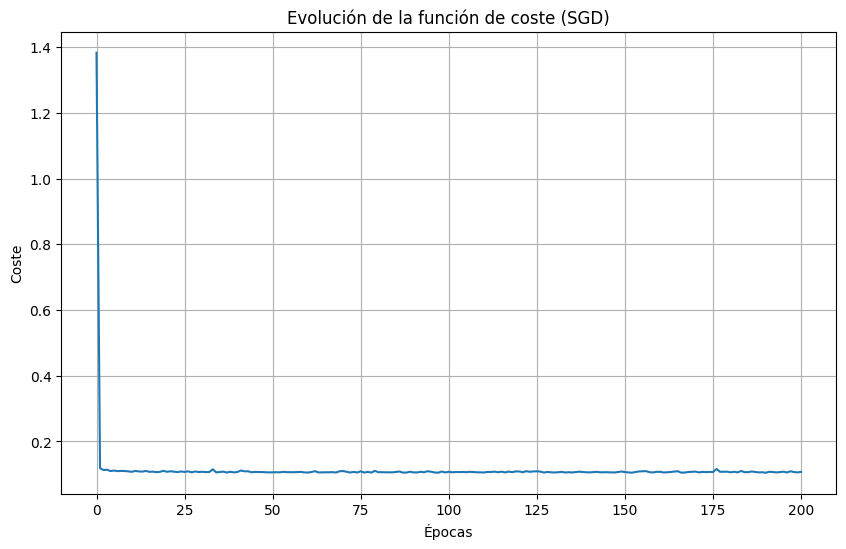

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Evolución de la función de coste (SGD)')
plt.xlabel('Épocas')
plt.ylabel('Coste')
plt.grid(True)
plt.show()

## Hacer predicciones finales

In [7]:
probabilities = softmax(np.dot(X, W_optimal))
predicted_houses = np.argmax(probabilities, axis=1)
actual_houses = np.argmax(y, axis=1)
accuracy = np.mean(predicted_houses == actual_houses)
print(f"\nPrecisión del modelo: {accuracy:.4f}")


Precisión del modelo: 0.9831


## Visualizar pesos

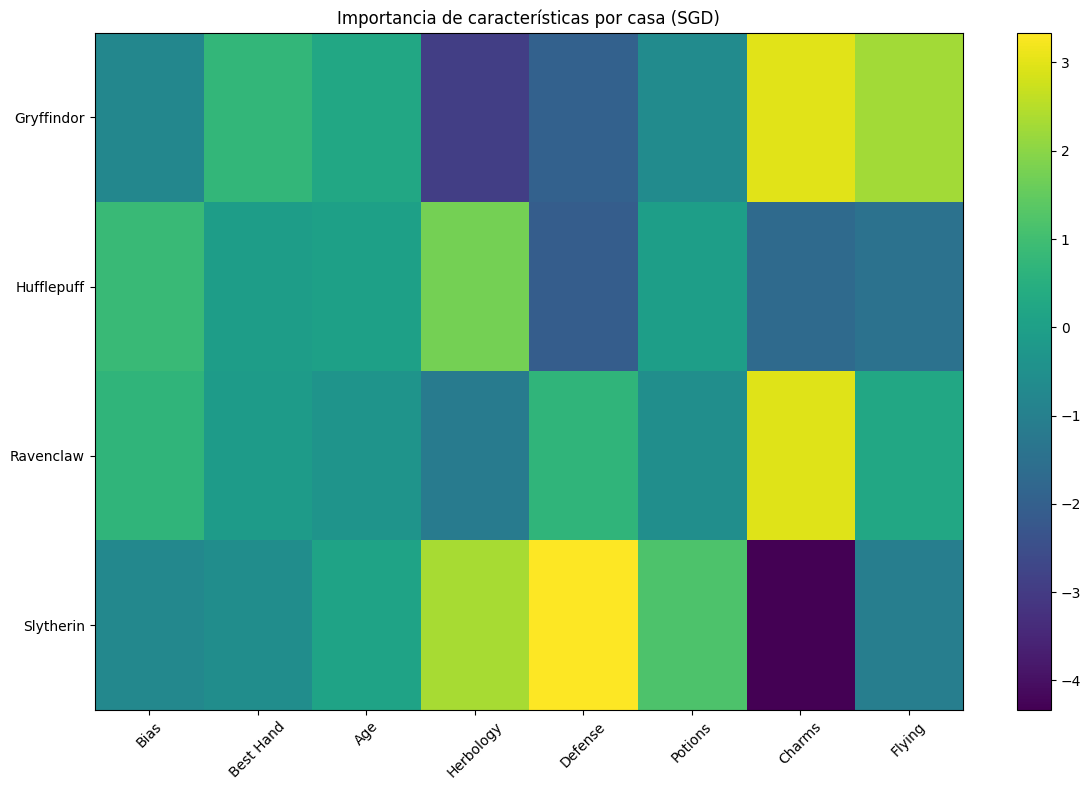

In [8]:
feature_names = ['Bias', 'Best Hand', 'Age', 'Herbology', 'Defense', 'Potions', 'Charms', 'Flying']
house_names = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

plt.figure(figsize=(12, 8))
plt.imshow(W_optimal.T, aspect='auto')
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.yticks(range(len(house_names)), house_names)
plt.title('Importancia de características por casa (SGD)')
plt.tight_layout()
plt.show()

## Grabación de los pesos óptimos

In [9]:
# Después del entrenamiento ejecutamos la función
save_weights(W_optimal, '../output/model_weights2.json')